# Exercícios 

Utilize os arquivos do **RECLAME AQUI** e crie um dashboard com algumas caracteristicas. 

Empresas: 
- Hapvida
- Nagem
- Ibyte

O painel deve conter tais informações: 

1. Série temporal do número de reclamações. 

2. Frequência de reclamações por estado. 

3. Frequência de cada tipo de **STATUS**

4. Distribuição do tamanho do texto (coluna **DESCRIÇÃO**) 


Alguns botões devem ser implementados no painel para operar filtros dinâmicos. Alguns exemplos:: 

1. Seletor da empresa para ser analisada. 

2. Seletor do estado. 

3. Seletor por **STATUS**

4. Seletor de tamanho do texto 

Faça o deploy da aplicação. Dicas: 

https://www.youtube.com/watch?v=vw0I8i7QJRk&list=PLRFQn2r6xhgcDMhp9NCWMqDYGfeeYsn5m&index=16&t=252s

https://www.youtube.com/watch?v=HKoOBiAaHGg&t=515s

Exemplo do github
https://github.com/jlb-gmail/streamlit_teste


**OBSERVAÇÃO**

A resposta do exercicio é o link do github e o link da aplicação. Coloque-os abaixo.  





In [1]:
import pandas as pd 

c:\Users\georg\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
path_ibyte = r"C:\Users\georg\OneDrive - GEORGE R BENTO\Cursos\MBA - Ciências de Dados\Dashboards Python\Exercício 2\RECLAMEAQUI_IBYTE.csv"
path_hapvida = r"C:\Users\georg\OneDrive - GEORGE R BENTO\Cursos\MBA - Ciências de Dados\Dashboards Python\Exercício 2\RECLAMEAQUI_HAPVIDA.csv"
path_nagem = r"C:\Users\georg\OneDrive - GEORGE R BENTO\Cursos\MBA - Ciências de Dados\Dashboards Python\Exercício 2\RECLAMEAQUI_NAGEM.csv"

In [5]:
# Lendo o arquivo CSV
df_ibyte = pd.read_csv(path_ibyte)
df_hapvida = pd.read_csv(path_hapvida)
df_nagem = pd.read_csv(path_nagem)



In [13]:
#Adicionando colunas com o nome da empresa
df_ibyte["EMPRESA"] = "Ibyte"
df_hapvida["EMPRESA"] = "Hapvida"
df_nagem["EMPRESA"] = "Nagem"

In [14]:
# Concatenando os três DataFrames em um único DataFrame
df_unico = pd.concat([df_ibyte, df_hapvida, df_nagem], ignore_index=True)




In [19]:
# Exibindo o resultado
df_unico.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,EMPRESA
0,21898349,Quebraram a tela do meu Notebook,Hidrolândia - CE,2016-02-11,Ibyte - Loja Física<->Informática,Resolvido,Em 05/10/2016 deixei meu Notebook para consert...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,2,11,42,6,3,1,1,Ibyte
1,22581481,Solicitação de Cancelamento de Compra,Araxá - MG,2016-03-12,Não consigo fazer operação por telefone<->Cana...,Em réplica,"Prezados, efetuei uma compra no site www.ameri...",https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2,Ibyte
2,22579385,Inutilizarão a tela do meu notebook,Fortaleza - CE,2016-03-12,Problemas na Loja<->Ibyte - Loja Física<->Prod...,Respondida,Decidi conserta meu notebook que parou de inic...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2,Ibyte
3,21328791,Produto não faz o que vendedor informa!,Fortaleza - CE,2016-04-10,Ibyte - Loja Física<->Impressoras<->Produto er...,Em réplica,Venho através desde canal de reclamação expor ...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,4,10,101,14,6,2,1,Ibyte
4,22608043,Ibyte não troca o produto,Fortaleza - CE,2016-05-12,Smartphone<->Celulares e Smartphones<->Blackfr...,Respondida,Comprei um celular na black Friday e com 4 dia...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,5,12,133,19,3,2,2,Ibyte


In [21]:
print(df_unico.columns)


Index(['ID', 'TEMA', 'LOCAL', 'TEMPO', 'CATEGORIA', 'STATUS', 'DESCRICAO',
       'URL', 'ANO', 'MES', 'DIA', 'DIA_DO_ANO', 'SEMANA_DO_ANO',
       'DIA_DA_SEMANA', 'TRIMETRES', 'CASOS', 'EMPRESA'],
      dtype='object')


1. Análise de Serie temporal


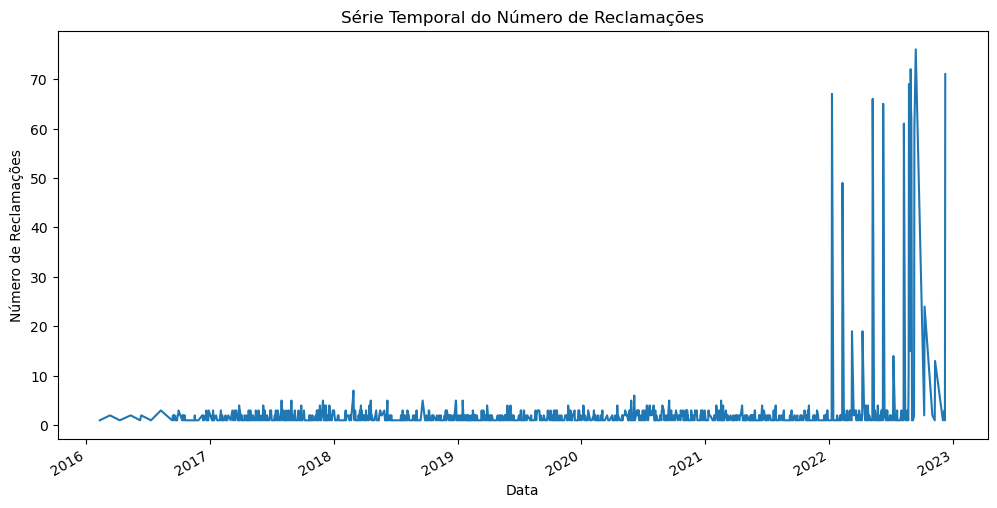

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Converter as colunas de 'ANO', 'MES' e 'DIA' em um datetime
df_unico['DATA'] = pd.to_datetime(df_unico[['ANO', 'MES', 'DIA']].rename(columns={'ANO': 'year', 'MES': 'month', 'DIA': 'day'}))

# Agrupar por data e contar o número de reclamações por dia
serie_temporal = df_unico.groupby('DATA').size()

# Plotar a série temporal
plt.figure(figsize=(12, 6))
serie_temporal.plot()
plt.title('Série Temporal do Número de Reclamações')
plt.xlabel('Data')
plt.ylabel('Número de Reclamações')
plt.show()



2. Frequencia por estado

In [24]:
# Agrupar por 'LOCAL' e contar o número de reclamações
frequencia_por_estado = df_unico['LOCAL'].value_counts()

# Exibir a distribuição
print(frequencia_por_estado)


LOCAL
Fortaleza - CE                  819
Recife - PE                     330
Salvador - BA                   214
Natal - RN                       91
Jaboatão dos Guararapes - PE     82
                               ... 
GOIANIA - GO                      1
Sertãozinho - SP                  1
Barretos - SP                     1
Aparecida - SP                    1
Lajedo - PE                       1
Name: count, Length: 306, dtype: int64


3. Frequencia de cada tipo de estado

In [25]:
# Agrupar por 'STATUS' e contar o número de ocorrências
frequencia_por_status = df_unico['STATUS'].value_counts()

# Exibir a distribuição
print(frequencia_por_status)


STATUS
Respondida        1050
Resolvido          735
Não respondida     644
Em réplica         334
Não resolvido      253
Name: count, dtype: int64


4. Distribuição do tamanho do texto (coluna DESCRIÇÃO)

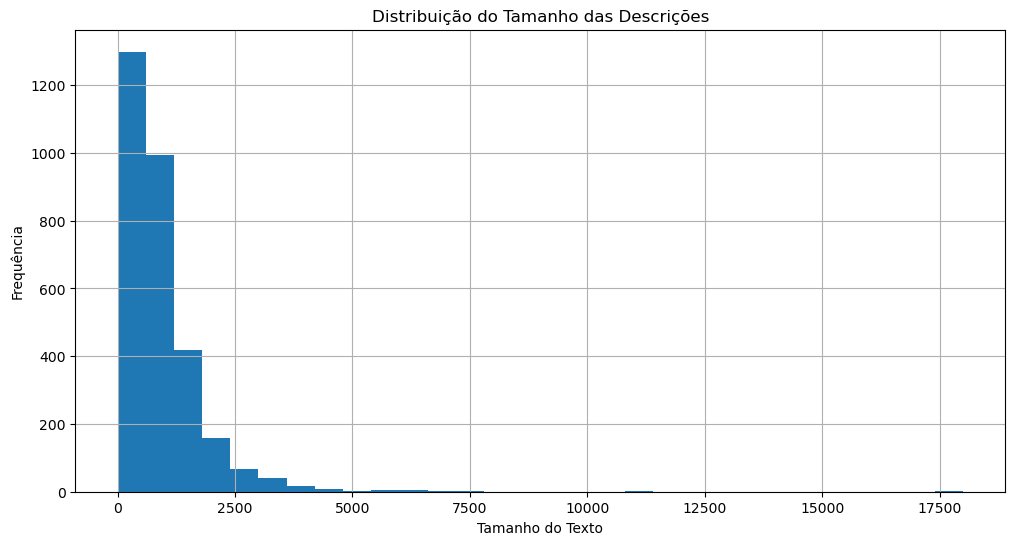

In [26]:
# Calcular o tamanho do texto em cada linha da coluna 'DESCRICAO'
df_unico['TAMANHO_DESCRICAO'] = df_unico['DESCRICAO'].apply(len)

# Plotar o histograma do tamanho das descrições
plt.figure(figsize=(12, 6))
df_unico['TAMANHO_DESCRICAO'].hist(bins=30)
plt.title('Distribuição do Tamanho das Descrições')
plt.xlabel('Tamanho do Texto')
plt.ylabel('Frequência')
plt.show()


CRIANDO O PAINEL NO STREAMLIT

In [27]:
import streamlit as st 

In [28]:
st.title('Trabalho Dashboard com Python')

2024-10-06 14:02:37.611 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-06 14:02:37.925 
  command:

    streamlit run c:\Users\georg\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-06 14:02:37.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()